In [2]:
### prediction of profit of 50_startups 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
data = pd.read_csv('C:/Users/OM/Downloads/50_startups.csv')
data
data.head()
data.dtypes
data.columns
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

C:\Users\OM\AppData\Local\Temp\ipykernel_19668\4051843808.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


0.164002172321177

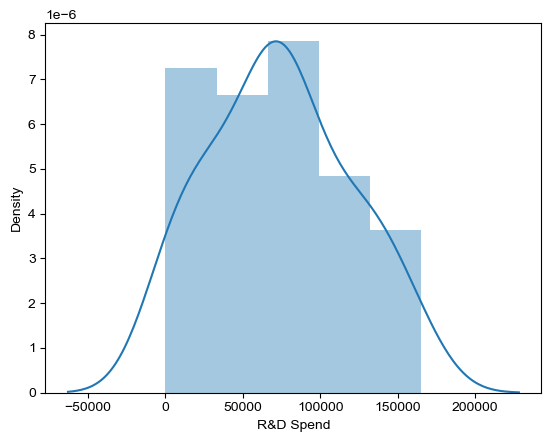

In [8]:
# EDA
sns.distplot(data['R&D Spend'])
sns.set_style('darkgrid')
data['R&D Spend'].skew()

C:\Users\OM\AppData\Local\Temp\ipykernel_19668\3789873473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Administration'])


-0.4890248099671768

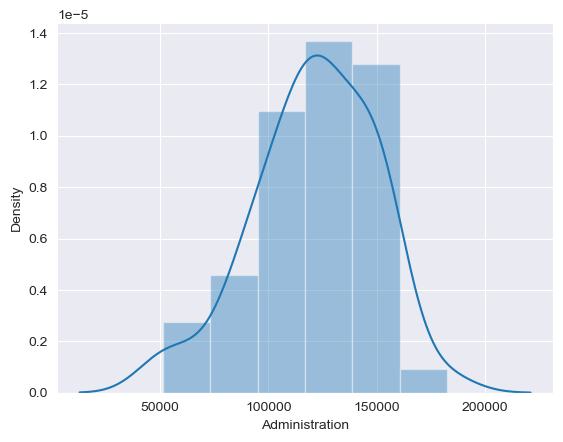

In [9]:
sns.distplot(data['Administration'])
sns.set_style('darkgrid')
data['Administration'].skew()

C:\Users\OM\AppData\Local\Temp\ipykernel_19668\1534754633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Marketing Spend'])


-0.04647226758360412

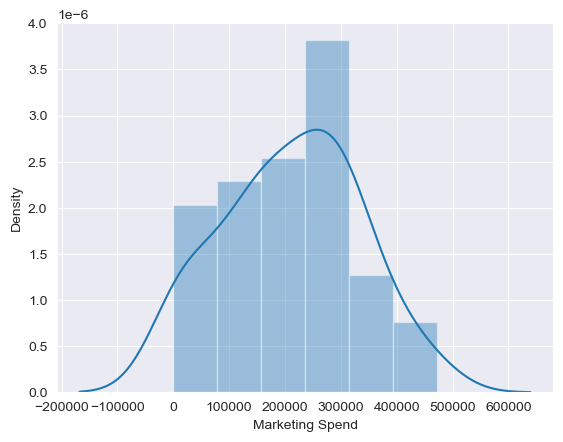

In [10]:
sns.distplot(data['Marketing Spend'])
sns.set_style('darkgrid')
data['Marketing Spend'].skew()

C:\Users\OM\AppData\Local\Temp\ipykernel_19668\257081815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'],bins = 5,kde = True)


0.023291019769116614

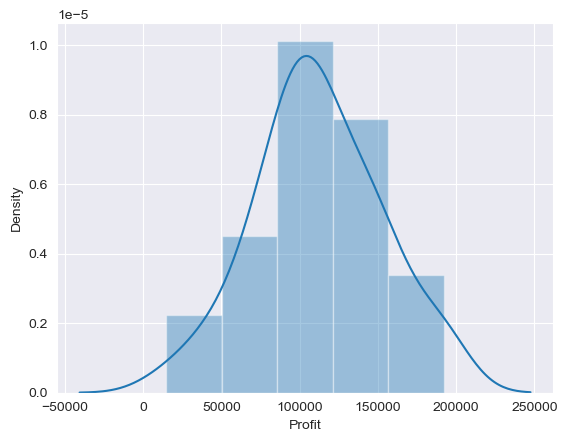

In [11]:
sns.distplot(data['Profit'],bins = 5,kde = True)
sns.set_style('darkgrid')
data['Profit'].skew()

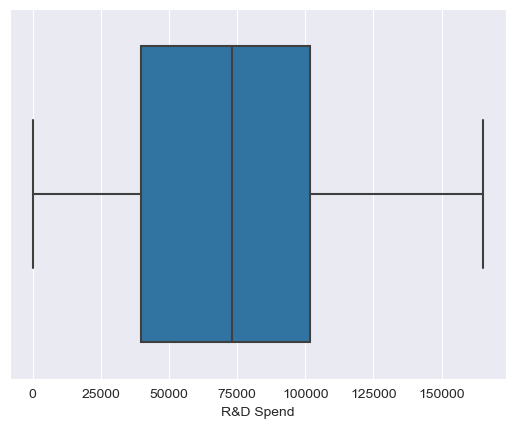

In [12]:
## finding outliers 
sns.boxplot(x = data['R&D Spend'])
sns.set_style('dark')

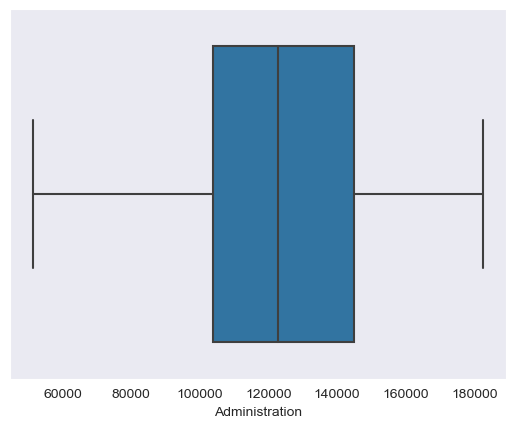

In [13]:
sns.boxplot(x = data['Administration'])
sns.set_style('dark')

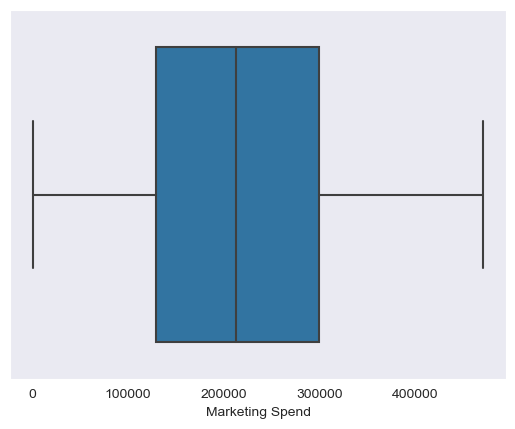

In [14]:
sns.boxplot(x = data['Marketing Spend'])
sns.set_style('dark')

<Axes: xlabel='Profit', ylabel='R&D Spend'>

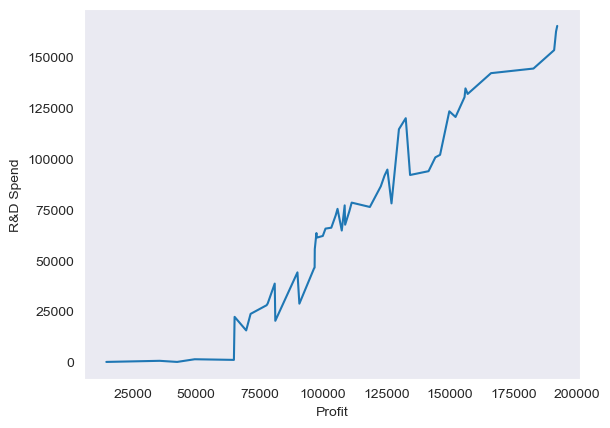

In [15]:
sns.lineplot(y ='R&D Spend',x = 'Profit',data = data)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

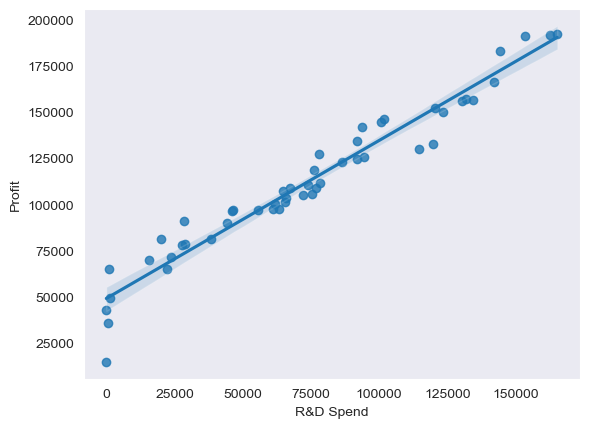

In [16]:
sns.regplot(x='R&D Spend',y = 'Profit',data = data)

<Axes: xlabel='Administration', ylabel='Profit'>

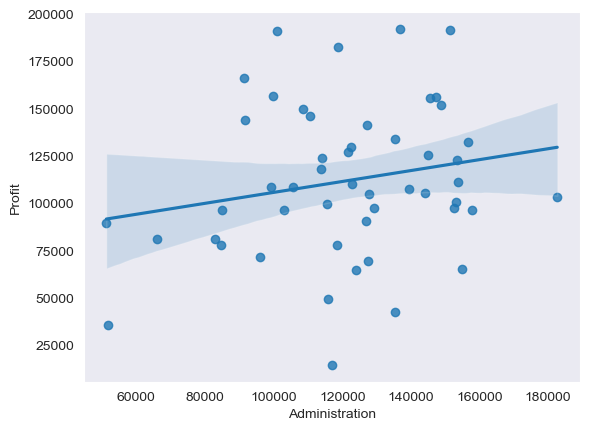

In [17]:
sns.regplot(x='Administration',y = 'Profit',data = data)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

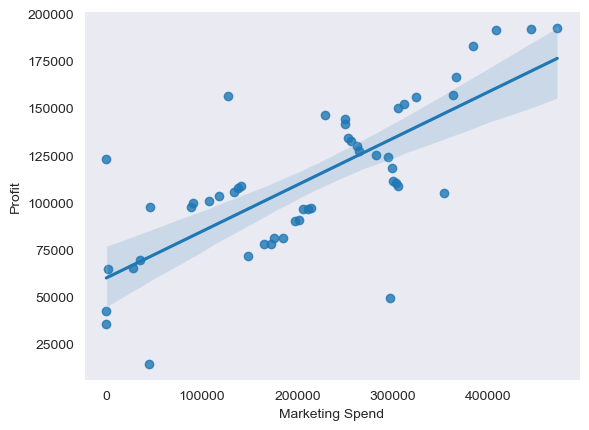

In [18]:
sns.regplot(x='Marketing Spend',y = 'Profit',data = data)

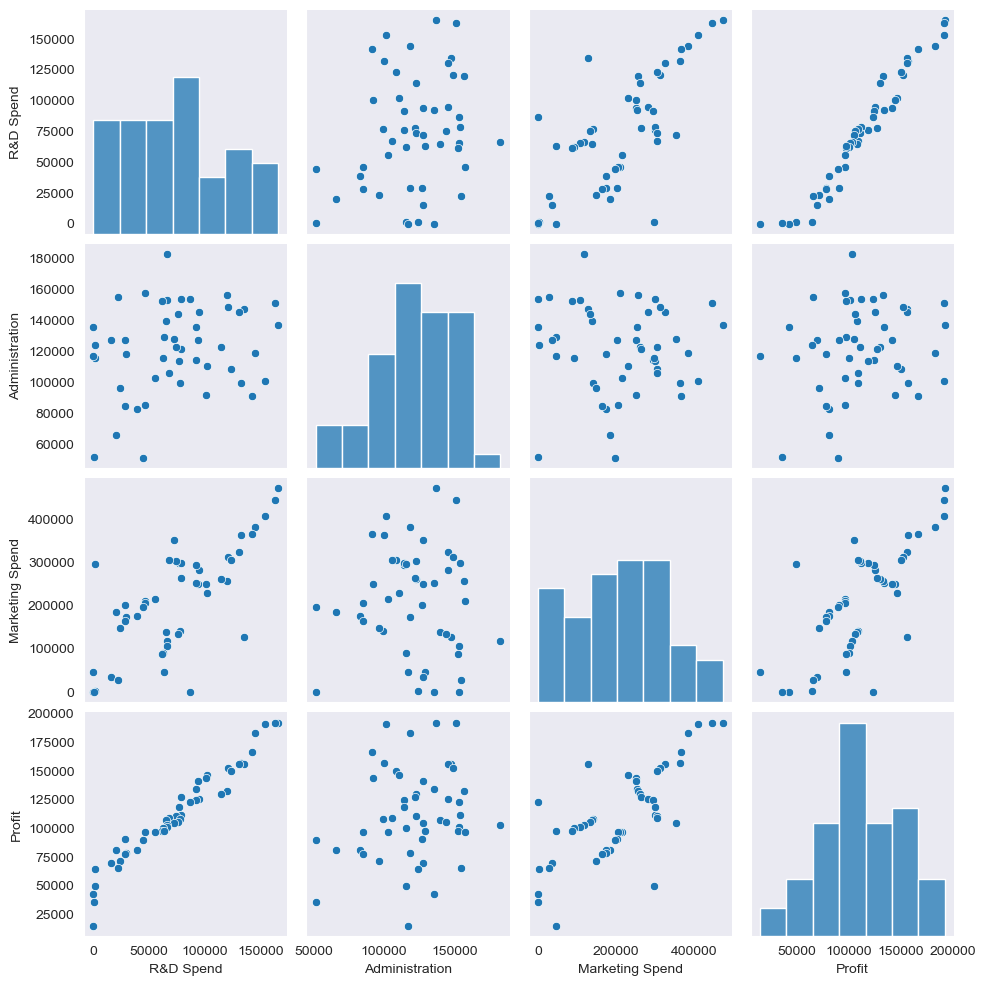

In [19]:
## pairplot
sns.pairplot(data)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

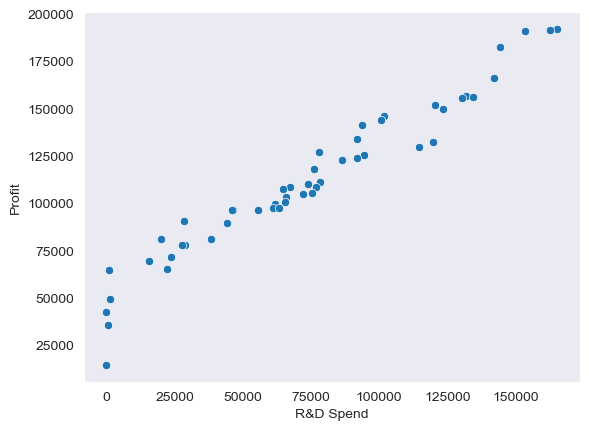

In [20]:
sns.scatterplot(x='R&D Spend',y = 'Profit',data = data)

<Axes: xlabel='State', ylabel='Profit'>

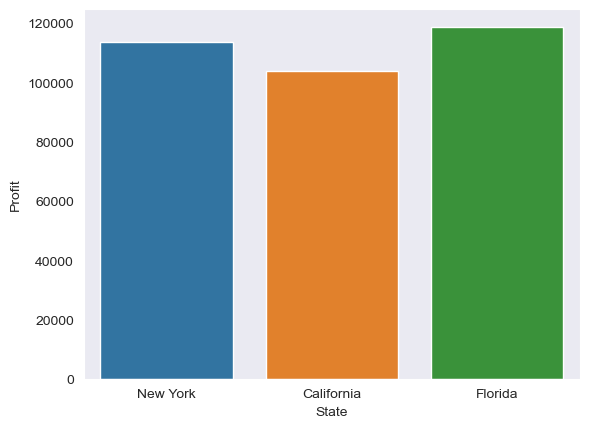

In [21]:
sns.barplot(x='State',y = 'Profit',data = data, errorbar= None, estimator='average')

C:\Users\OM\AppData\Local\Temp\ipykernel_19668\3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

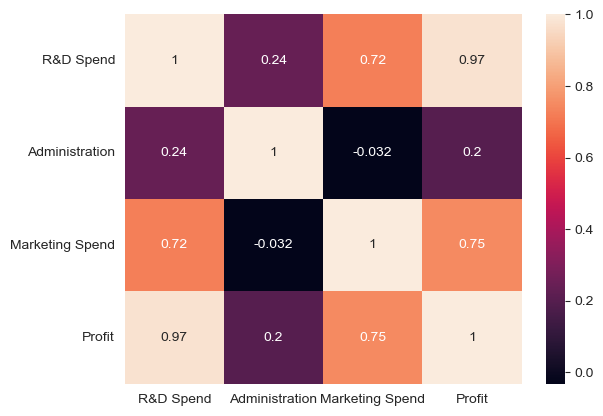

In [22]:
sns.heatmap(data.corr(),annot = True)

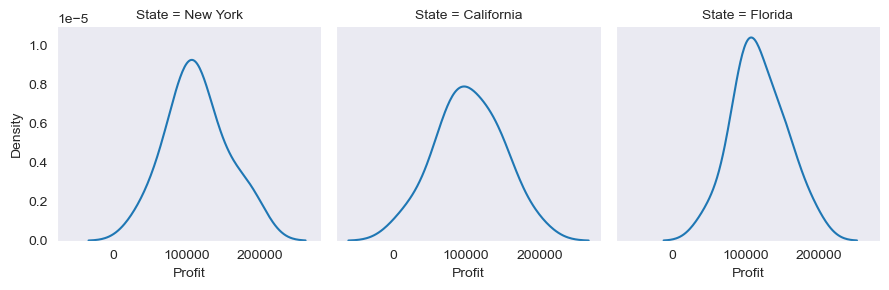

In [23]:
g = sns.FacetGrid(data, col = 'State')
g = g.map(sns.kdeplot,'Profit')

In [24]:
##encoding categoricaldata
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
data['State'] = labelencoder.fit_transform(data['State'])
#onehotencoder = OneHotEncoder(categorical_features=['State'])
#data = onehotencoder.fit_transform(data).toarray()
onehotencoder = ColumnTransformer([("State", OneHotEncoder(), [0])], remainder = "passthrough")
c3 = onehotencoder.fit_transform(data)
c3

<50x53 sparse matrix of type '<class 'numpy.float64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [25]:
c3 = c3[:,1:]

In [26]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [27]:
X = data[['R&D Spend','Administration','Marketing Spend','State']]   
Y = data['Profit']


In [28]:
#training
def train_test(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size = 0.6,random_state = 1234)
    print(X_train.shape),print(Y_train.shape)
    print(X_test.shape),print(Y_test.shape)
    return X_train,X_test,Y_train,Y_test

In [29]:
X_train,X_test,Y_train,Y_test = train_test(X,Y)

(20, 4)
(20,)
(30, 4)
(30,)


In [30]:
def modelling (X_train,Y_train,X_test):
    model = LinearRegression()
    print(model)
    model_train = model.fit(X_train,Y_train)
    print("Model Training is completed")
    pred = model_train.predict(X_test)
    return pred

In [31]:
pred = modelling(X_train,Y_train,X_test)
pred.reshape(-1,1)

LinearRegression()
Model Training is completed


array([[ 95482.64003695],
       [ 47839.55990844],
       [160772.18435152],
       [ 65737.40065453],
       [128290.62689538],
       [ 74579.49410219],
       [148735.54048611],
       [100109.69265311],
       [173874.35469736],
       [ 51034.81208241],
       [113256.52240902],
       [129198.10662953],
       [137024.62805259],
       [113854.71399952],
       [ 96184.00823533],
       [103751.9233008 ],
       [148170.59310886],
       [127258.06662132],
       [117854.15091493],
       [ 60005.926172  ],
       [111128.57938435],
       [187873.10323741],
       [ 99115.59141617],
       [ 53958.28825336],
       [182941.76177027],
       [102384.36952604],
       [ 91381.64498938],
       [ 87766.63229958],
       [ 88032.9147933 ],
       [189052.40382531]])

In [32]:
Y_test

37     89949.14
45     64926.08
6     156122.51
44     65200.33
13    134307.35
36     90708.19
8     152211.77
29    101004.64
4     166187.94
49     14681.40
21    111313.02
18    124266.90
10    146121.95
22    110352.25
31     97483.56
25    107404.34
14    132602.65
17    125370.37
20    118474.03
43     69758.98
27    105008.31
1     191792.06
33     96778.92
48     35673.41
2     191050.39
32     97427.84
35     96479.51
39     81005.76
34     96712.80
0     192261.83
Name: Profit, dtype: float64

In [38]:
pred.reshape(-1,1)

array([[ 95480.48152017],
       [ 47842.15734109],
       [160769.31995883],
       [ 65736.16968064],
       [128288.68182051],
       [ 74580.28527764],
       [148737.28666888],
       [100111.81548132],
       [173873.3959175 ],
       [ 51033.61054429],
       [113258.97253253],
       [129197.99960394],
       [137024.13959373],
       [113855.00488927],
       [ 96186.14863665],
       [103750.14907498],
       [148170.34503579],
       [127260.11811913],
       [117852.3721187 ],
       [ 60008.41196335],
       [111131.01954933],
       [187870.6918781 ],
       [ 99115.74334038],
       [ 53960.16491115],
       [182940.83041058],
       [102382.26070616],
       [ 91383.67751035],
       [ 87764.81960502],
       [ 88031.81818408],
       [189053.74181754]])

<Axes: xlabel='Administration', ylabel='Profit'>

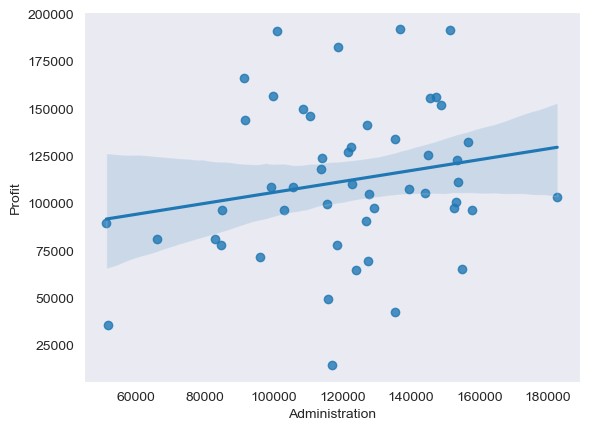

In [33]:
sns.regplot(x = 'Administration', y ='Profit',data = data)

In [34]:
mean_squared_error(Y_test,pred)
r2_score(Y_test,pred)

0.9401774321191684

In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import PolynomialFeatures
X = data[['R&D Spend','Administration','Marketing Spend','State']]   
Y = data['Profit']

def train_test(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size = 0.6,random_state = 1234)
    print(X_train.shape),print(Y_train.shape)
    print(X_test.shape),print(Y_test.shape)
    return X_train,X_test,Y_train,Y_test

X_train,X_test,Y_train,Y_test = train_test(X,Y)
def modelling (X_train,Y_train,X_test):
    model =Ridge()
    print(model)
    model_train = model.fit(X_train,Y_train)
    print("Model Training is completed")
    pred = model_train.predict(X_test)
    return pred
pred = modelling(X_train,Y_train,X_test)
pred.reshape(-1,1)
mean_squared_error(Y_test,pred)
r2_score(Y_test,pred)





(20, 4)
(20,)
(30, 4)
(30,)
Ridge()
Model Training is completed


0.9404141912136609

In [36]:
X_train,X_test,Y_train,Y_test = train_test(X,Y)
def modelling (X_train,Y_train,X_test):
    model = Lasso()
    print(model)
    model_train = model.fit(X_train,Y_train)
    print("Model Training is completed")
    pred = model_train.predict(X_test)
    return pred
pred = modelling(X_train,Y_train,X_test)
pred.reshape(-1,1)
mean_squared_error(Y_test,pred)
r2_score(Y_test,pred)


(20, 4)
(20,)
(30, 4)
(30,)
Lasso()
Model Training is completed


0.9401812749984191